## IMPORTING LIBRARIES

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

from keras.layers import Dense, BatchNormalization, Dropout, LSTM, Input,BatchNormalization, LeakyReLU
from keras.optimizers import RMSprop,SGD,Adam
from keras.regularizers import l2
from keras import regularizers
from keras import callbacks
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

from sklearn.preprocessing import LabelEncoder

## IMPORTING DATASET

In [21]:
data = pd.read_csv("DATASET/Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


## EDA

C:\Users\user\AppData\Local\Temp\ipykernel_19864\3649692763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig_1=sns.countplot(x= data["Result"], palette= cols)


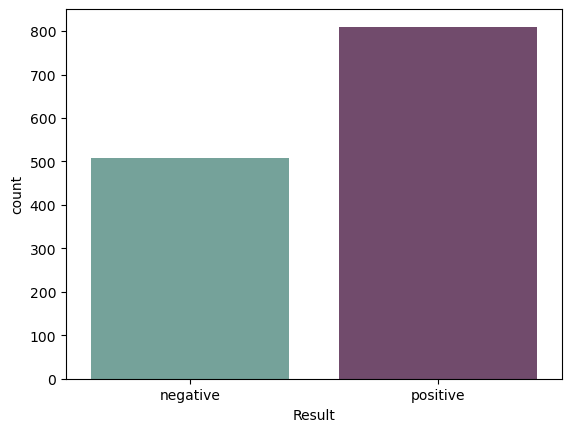

In [23]:
cols= ["#6daa9f","#774571"]
fig_1=sns.countplot(x= data["Result"], palette= cols)

plt.savefig("Fig_1.png", format="png", dpi=300, bbox_inches="tight")

In [25]:
# change result to numerical valueab

data['Result'] = data['Result'].map({'negative': 0, 'positive': 1})

data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,0
1,20,1,94,98,46,296.0,6.75,1.060,1
2,56,1,64,160,77,270.0,1.99,0.003,0
3,66,1,70,120,55,270.0,13.87,0.122,1
4,54,1,64,112,65,300.0,1.08,0.003,0


### CORRELATION MATRIX

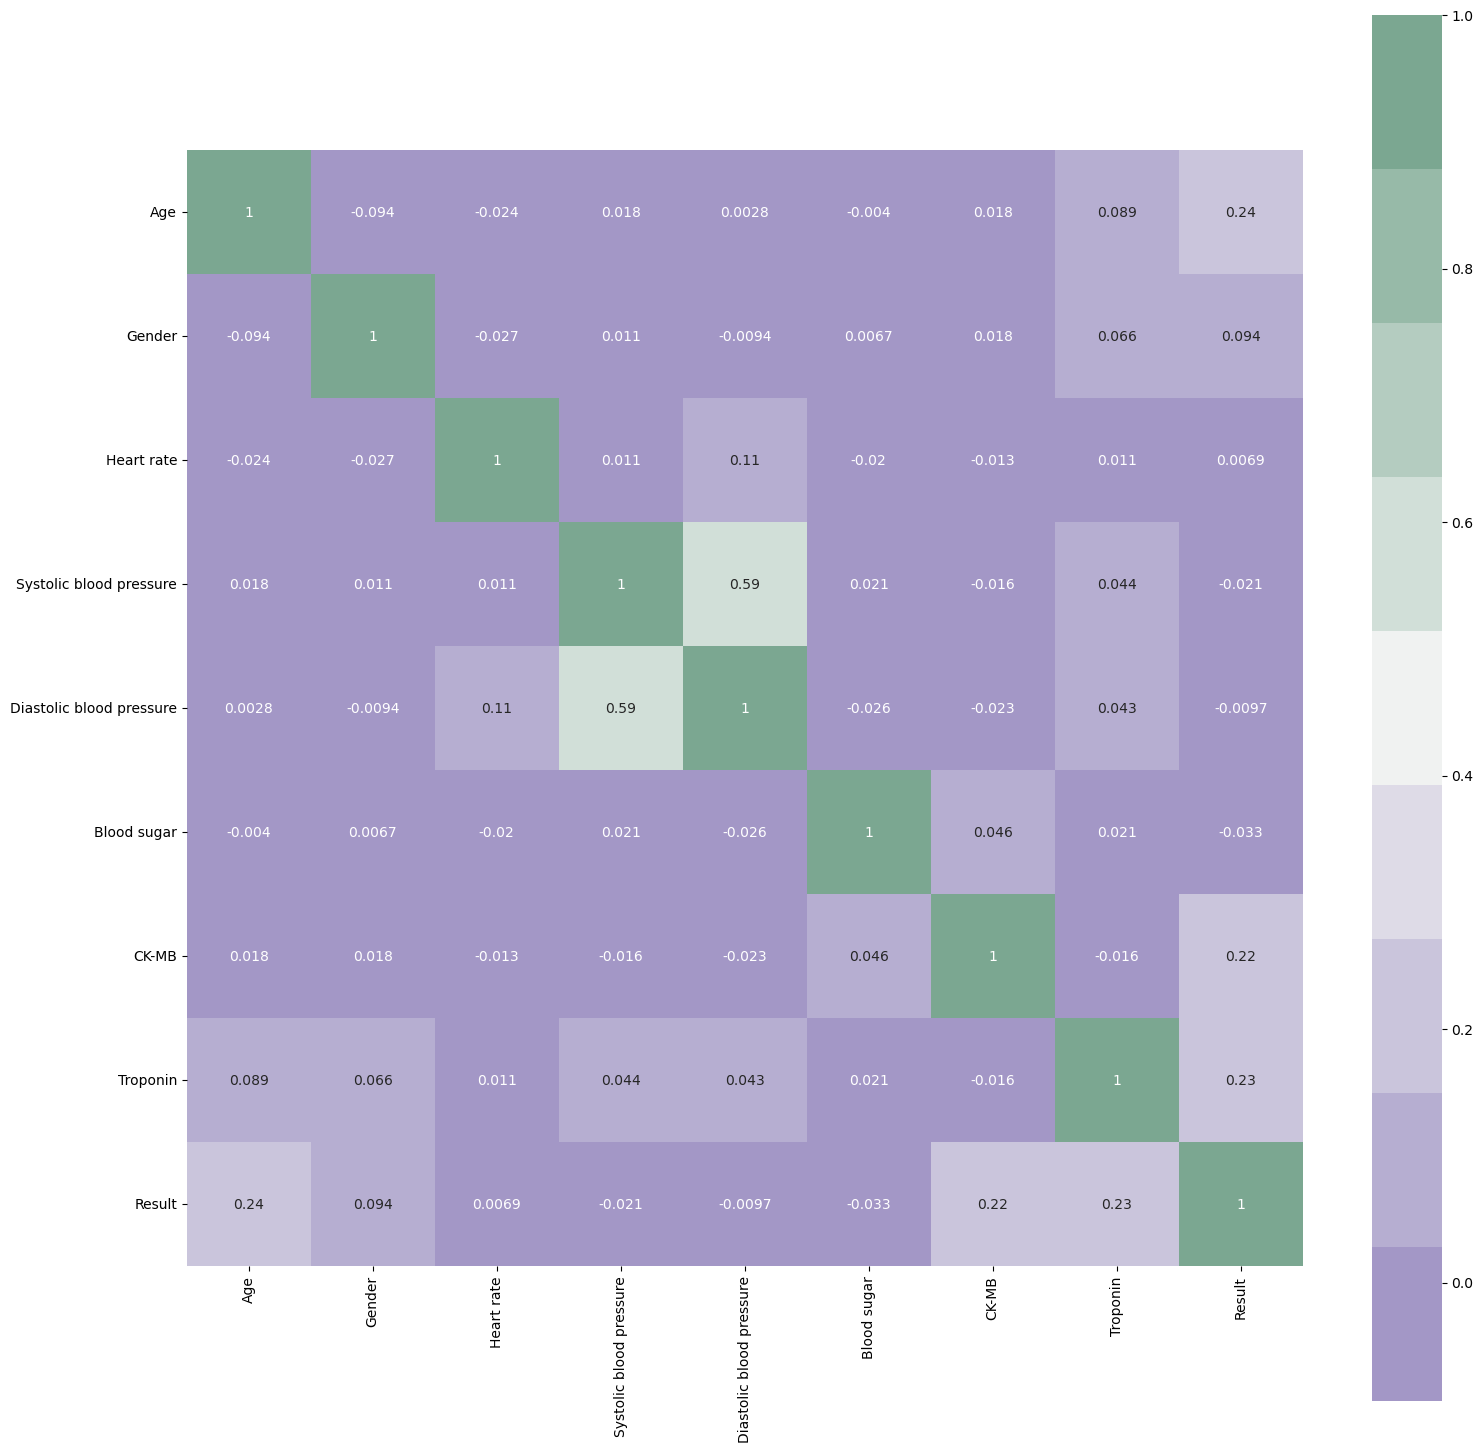

In [27]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

plt.savefig("Fig_2.png", format="png", dpi=300, bbox_inches="tight")

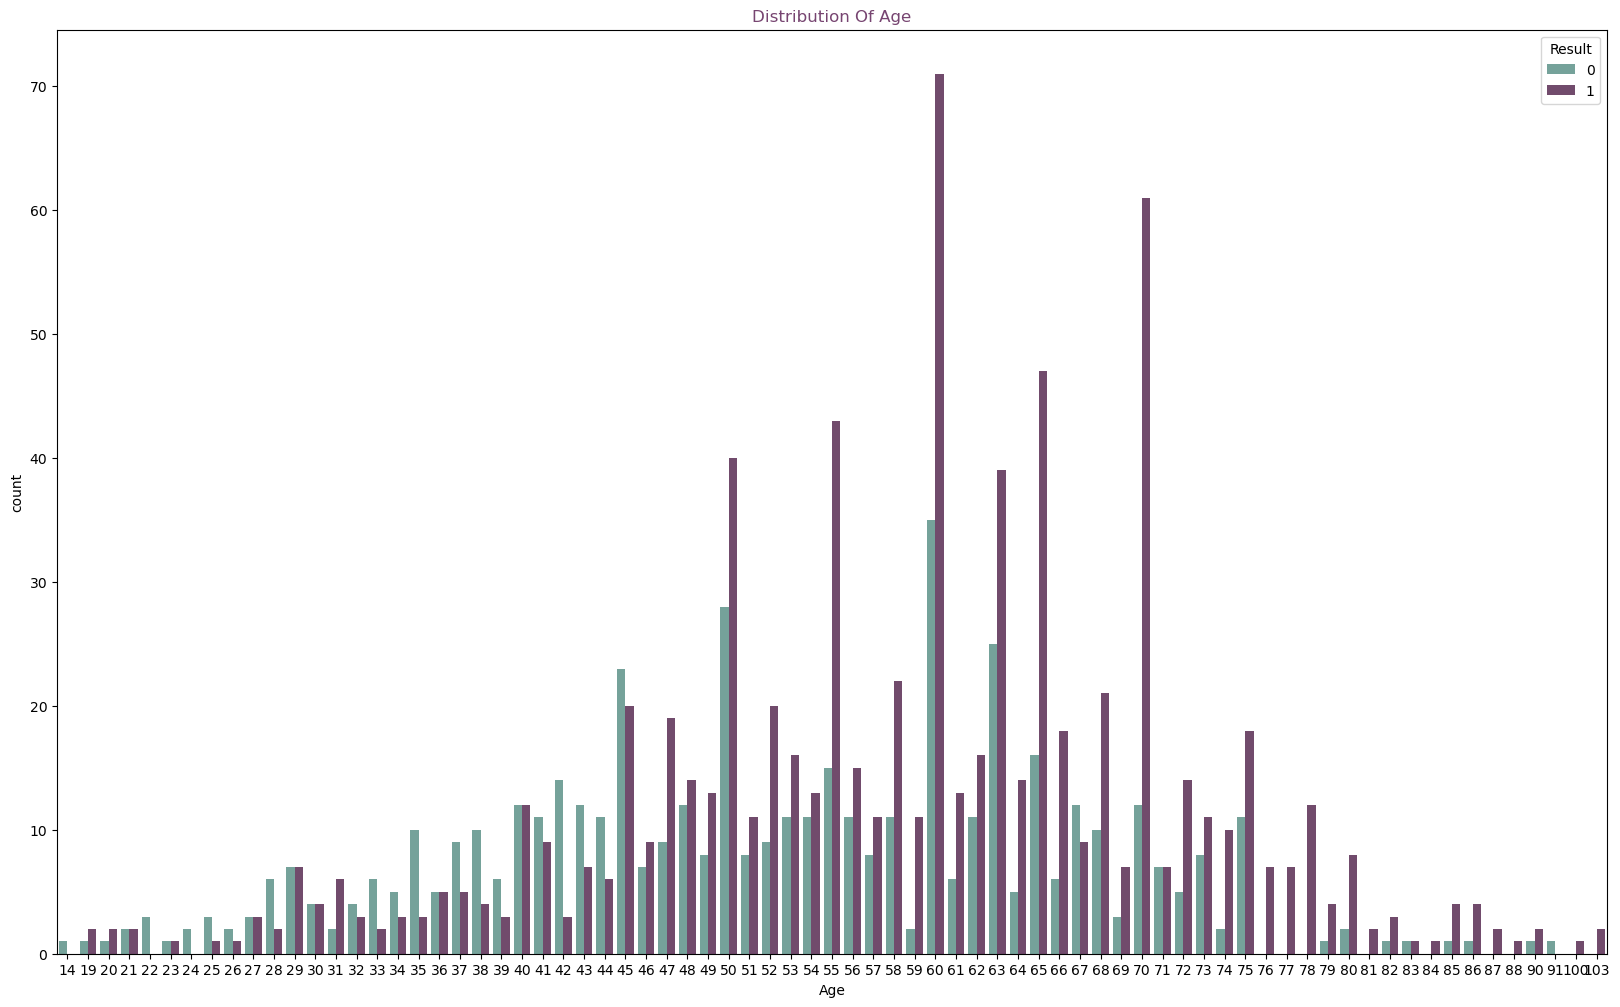

In [29]:
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=data['Age'],data=data, hue ="Result",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

plt.savefig("Fig_3.png", format="png", dpi=300, bbox_inches="tight")

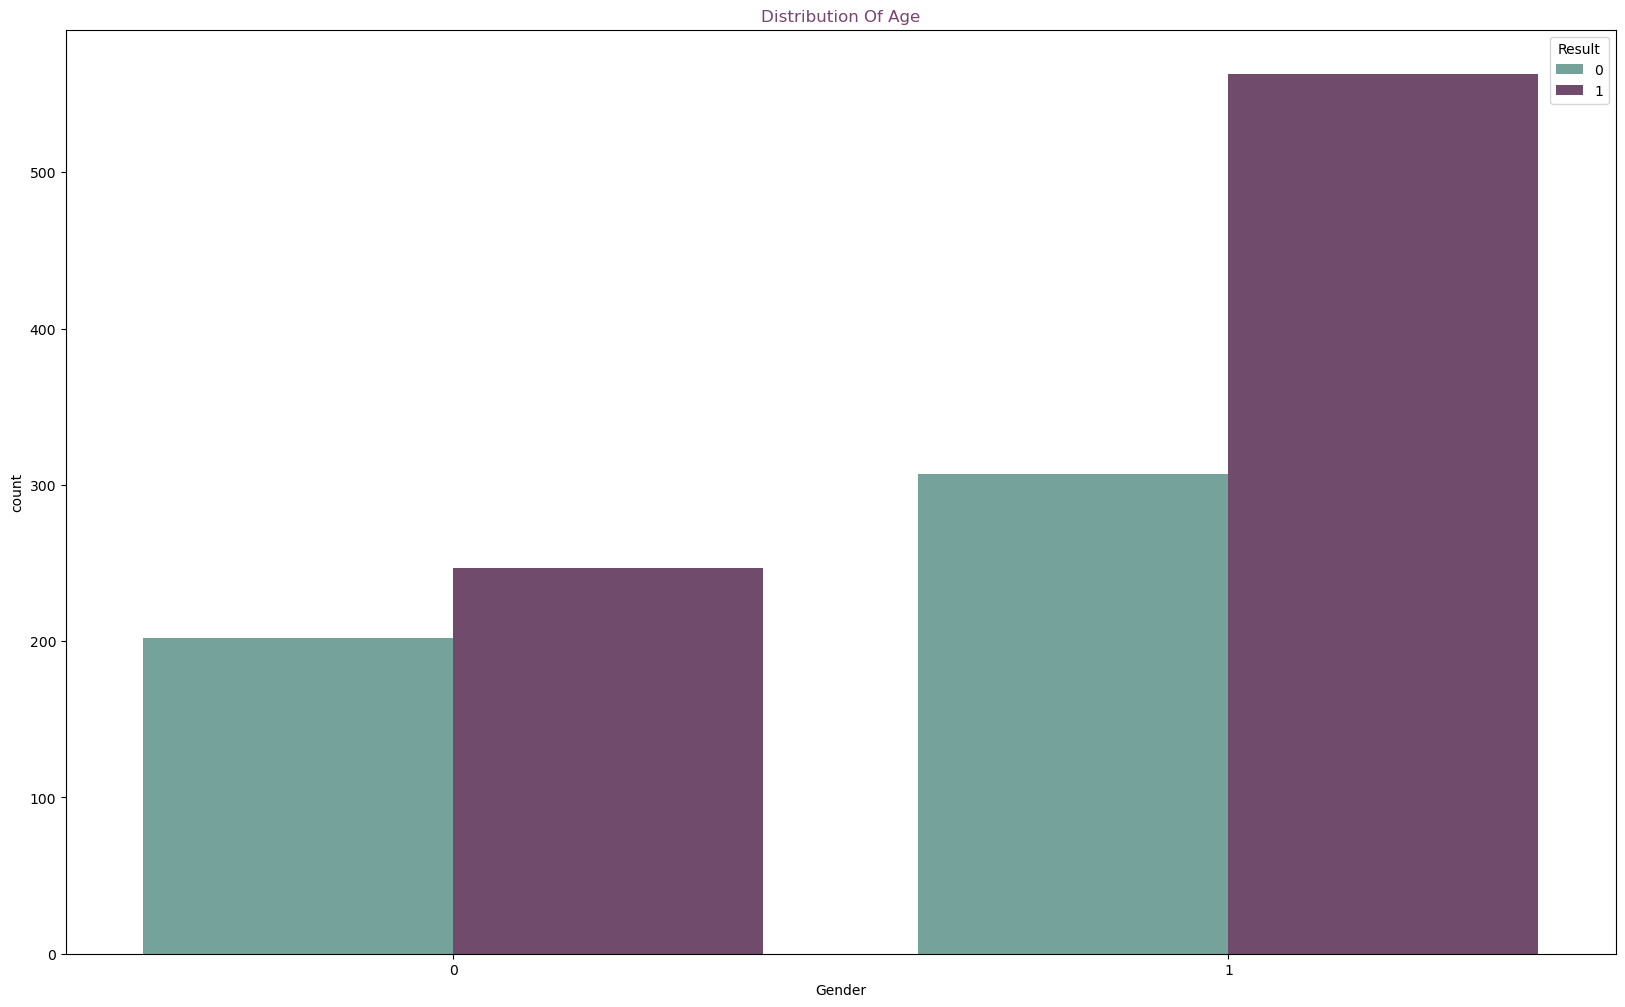

In [31]:
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=data['Gender'],data=data, hue ="Result",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

plt.savefig("Fig_4.png", format="png", dpi=300, bbox_inches="tight")

## DATA PRE PROCESSING

In [33]:
# split data into feautures and labels
Feature=data.drop(["Result"],axis=1)
Label=data["Result"]

Feature.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
0,63,1,66,160,83,160.0,1.80,0.012
1,20,1,94,98,46,296.0,6.75,1.060
2,56,1,64,160,77,270.0,1.99,0.003
3,66,1,70,120,55,270.0,13.87,0.122
4,54,1,64,112,65,300.0,1.08,0.003


C:\Users\user\AppData\Local\Temp\ipykernel_19864\1495474496.py:3: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = Feature,palette = colours)


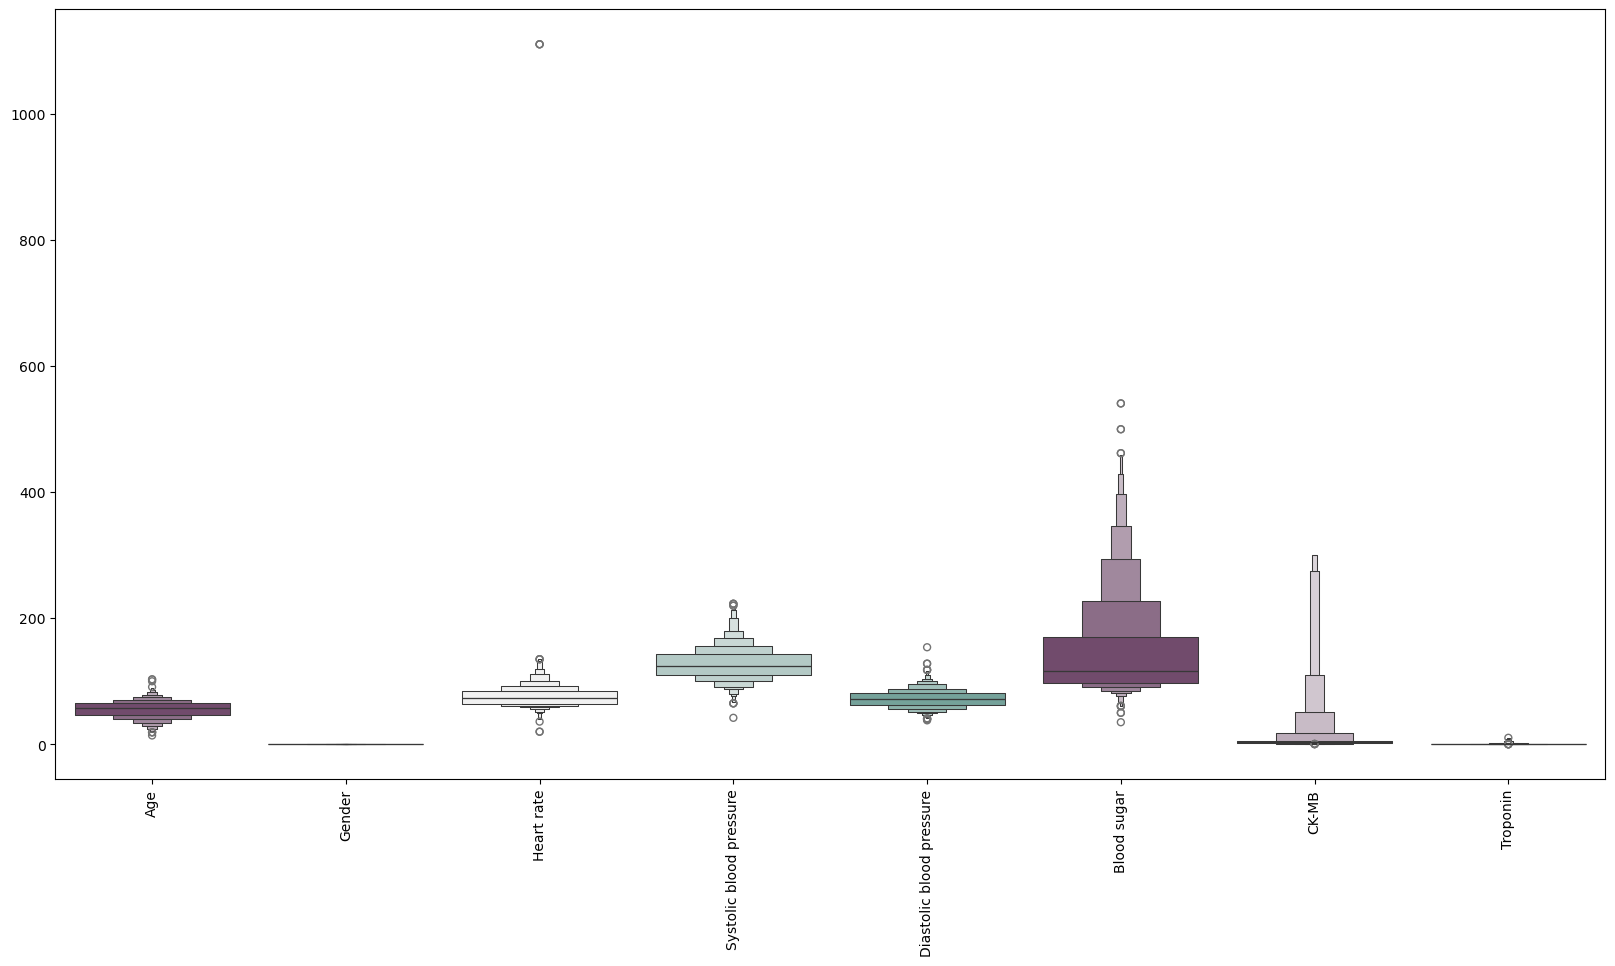

In [35]:
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = Feature,palette = colours)
plt.xticks(rotation=90)
plt.savefig("Fig_5.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

#### NORMALIZATION 

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Feature = scaler.fit_transform(Feature)

#### AFTER NORMALIZATION

C:\Users\user\AppData\Local\Temp\ipykernel_19864\3050237779.py:3: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = Feature,palette = colours)


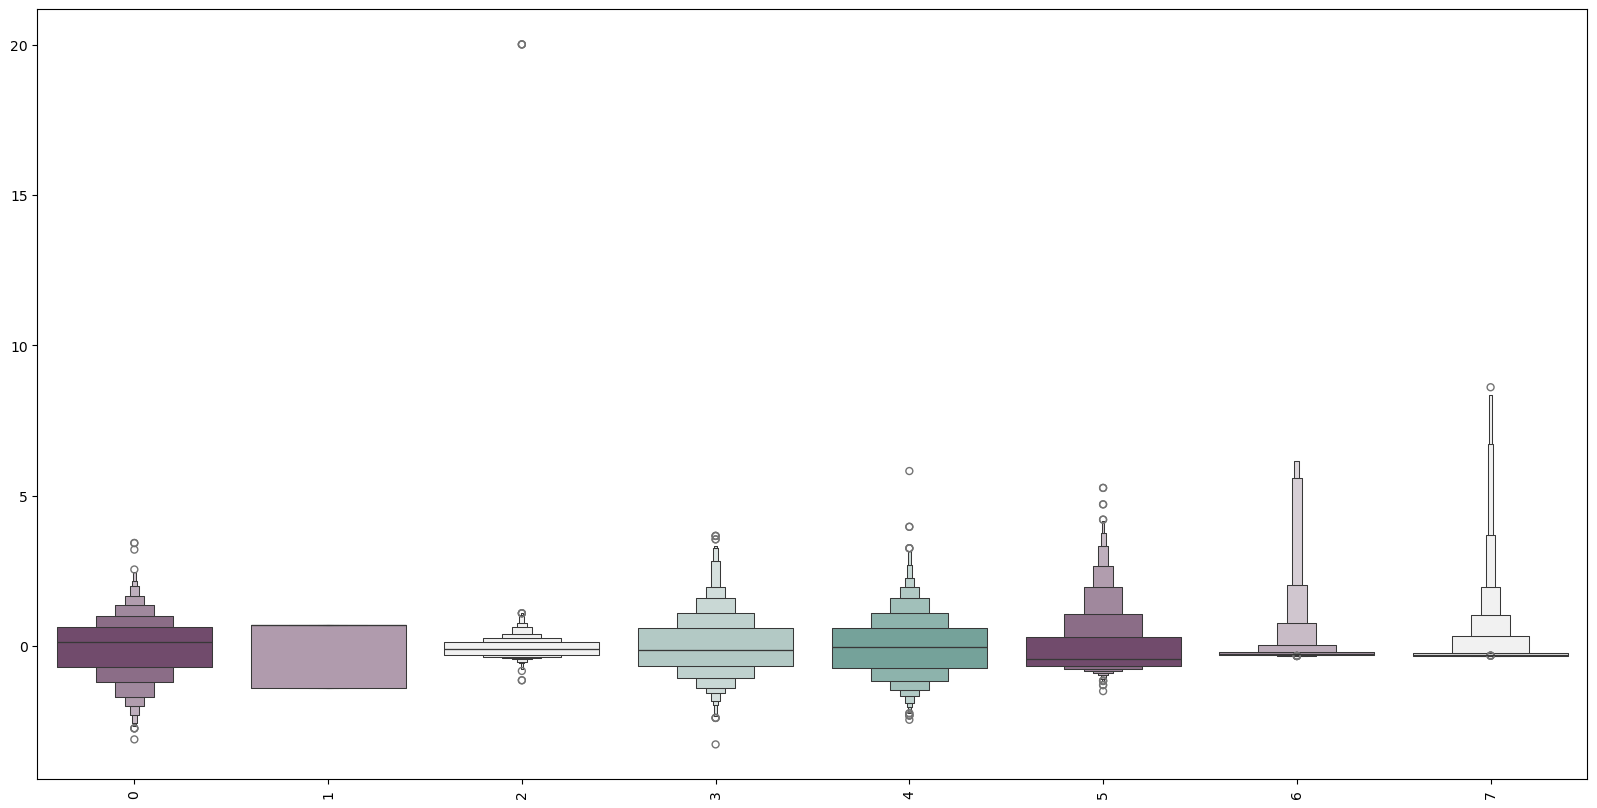

In [269]:
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = Feature,palette = colours)
plt.xticks(rotation=90)
plt.savefig("Fig_8.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

#### SPLIT DATA

In [253]:
# split data into testing and training data
Feature_train, Feature_test, Label_train,Label_test = train_test_split(Feature,Label,test_size=0.25,random_state=7)

## BUILDING MODEL

In [255]:
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    min_delta=0.0001, 
    restore_best_weights=True
)

# ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=5, 
    min_lr=1e-6
)

#ANN model architecture
model = Sequential()
model.add(Input(shape=(Feature_train.shape[1],)))  # Input layer for the number of features
model.add(Dense(32, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.2))

model.add(Dense(16, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.2))

model.add(Dense(8, kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.3))

model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_75 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_76 (LeakyReLU)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_77 (LeakyReLU)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 112 (448.00 B)

### TRAINING MODEL

In [257]:
history = model.fit(
    Feature_train, 
    Label_train, 
    validation_split=0.2,
    epochs=100, 
    batch_size=64, 
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4985 - loss: 1.8519 - val_accuracy: 0.5051 - val_loss: 1.7617 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5620 - loss: 1.7567 - val_accuracy: 0.5455 - val_loss: 1.6872 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5502 - loss: 1.6936 - val_accuracy: 0.5859 - val_loss: 1.6315 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5851 - loss: 1.6472 - val_accuracy: 0.5859 - val_loss: 1.5850 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6050 - loss: 1.5927 - val_accuracy: 0.6061 - val_loss: 1.5441 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5893 - loss: 1.5738 - val_accuracy: 0.6515 - val_loss: 1.5054 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6271 - loss: 1.5138 - val_a

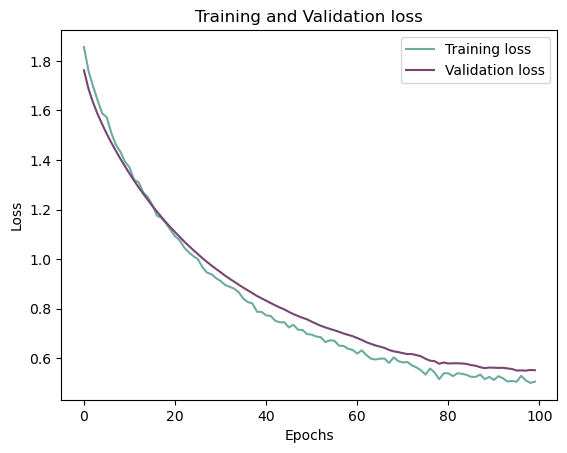

In [259]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.savefig("Fig_6.png", format="png", dpi=300, bbox_inches="tight")
plt.show()


### MODEL PERFORMANCE

In [261]:
y_pred = model.predict(Feature_test)
y_pred = ( y_pred> 0.5)
np.set_printoptions()
#y_pred

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Model_accuracy: 0.8393939393939394


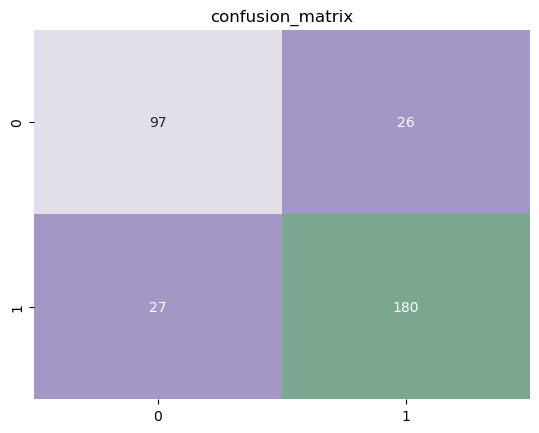

In [263]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
ann_cm=confusion_matrix(Label_test,y_pred)
ann_ac=accuracy_score(y_pred,Label_test)
plt.title("confusion_matrix")
sns.heatmap(ann_cm,cmap = cmap1,annot=True,fmt="d",cbar=False)
print('Model_accuracy:',ann_ac)

plt.savefig("Fig_7.png", format="png", dpi=300, bbox_inches="tight")


In [265]:
print(classification_report(Label_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       123
           1       0.87      0.87      0.87       207

    accuracy                           0.84       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.84      0.84      0.84       330



## EXPORT TRAINED MODEL

In [ ]:
import pickle
pickle.dump(model,open('My_ANN.pkl','wb'))

### TESTING PICKLED MODEL

In [ ]:
test=Feature_test.iloc[7]
test = np.array(test, dtype=np.float32).reshape(1, 8)

In [ ]:
model_1 = pickle.load(open('My_ANN.pkl','rb'))
Prediction = model_1.predict([[test]])


In [ ]:
Prediction = (Prediction > 0.5)
Prediction